# Certificate in Data Science | Assignment 4 |  
> University of Washington, Seattle, WA    
> December 2019  
> N. Hicks

## Problem Statement  

You are working for a data science consulting company. Your company is approached by a client requesting that you analyze crime data across the United States. At first glance, you notice that the data has 128 attributes and cannot be examined manually. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.  
> OBJECTIVE: identify which are the most important features or attributes that contribute to crime.  
<br>  
> ***Perform each of the following tasks and answer the related questions.***  
> - Read data.  
> - Apply three techniques for feature selection:  
      1. Filter methods.  
      2. Wrapper methods.  
      3. Embedded methods.
> - Describe your findings.


## Import Libraries

In [1]:
'''
Import Required Libraries
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mutual_info_score

from sklearn.feature_selection import RFE   #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS   # Sequential Feature Selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn import linear_model


## Establish the Dataset

### Functions for Scripting

In [2]:
'''
Retrieve the prescribed dataset.
RETURN: pd.DataFrame
'''
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path + file, sep=',', header=None)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED;\nREMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path, file))
    
    return _df

In [3]:
'''
Create a scale function for a single feature.
RETURN: a scaled column feature
'''
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [4]:
'''
Calculate the Mutual Information of the input attribute and its target
RETURN: real number
'''
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

### Import the Data

In [5]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/'
file = 'communities.data'
communities_df = fetch_data(path, file)

REMOTE FILE USED


## Wrangle the Data  
> Basic data integrity

In [6]:
communities_df = communities_df.rename(columns={2: 'zipcode', 3: 'location'})
communities_df.shape

(1994, 128)

In [7]:
communities_df.head(25)

,0,1,zipcode,location,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


### Replace Missing Values

In [8]:
# replace all '?' values with '0' values
communities_df = communities_df.replace('?', 0)

In [9]:
# update numeric column dtypes
attributes = communities_df.columns
attributes = attributes.drop('location')
print('OBJECT COLUMNS CONVERTED TO NUMERIC DTYPES')
print('==========================================')
for attr in attributes:
    val = communities_df[attr].dtype
    if  val == 'object':
        print('({}) {}'.format(attr, communities_df[attr].dtype))
        communities_df[attr] = pd.to_numeric(communities_df[attr])

OBJECT COLUMNS CONVERTED TO NUMERIC DTYPES
(1) object
(zipcode) object
(30) object
(101) object
(102) object
(103) object
(104) object
(105) object
(106) object
(107) object
(108) object
(109) object
(110) object
(111) object
(112) object
(113) object
(114) object
(115) object
(116) object
(117) object
(121) object
(122) object
(123) object
(124) object
(126) object


In [10]:
# return the dtypes of all attributes
list(communities_df.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype(

In [11]:
communities_df.describe()

,0,1,zipcode,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,24.191575,18924.709629,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,...,0.065231,0.232854,0.161685,0.026093,0.012272,0.111760,0.070461,0.094052,0.031209,0.237979
std,16.397553,86.058017,27897.731489,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,...,0.109459,0.203092,0.229055,0.104581,0.062672,0.270038,0.228819,0.240328,0.097190,0.232985
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,...,0.020000,0.100000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
50%,34.000000,0.000000,0.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,...,0.040000,0.170000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
75%,42.000000,17.000000,39596.250000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,...,0.070000,0.280000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000
max,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# describe all unique attributes of all dataset features
features_all = communities_df.columns
print('THE UNIQUE VALUES OF ALL DATASET FEATURES')
print('=========================================')
for feature in features_all:
    val = communities_df[feature].unique()
    print('\n' + str(feature) + ' ({}):\n{}'.format(len(val), val))

THE UNIQUE VALUES OF ALL DATASET FEATURES

0 (46):
[ 8 53 24 34 42  6 44 21 29 36 25 55 19 18 12 41 39 54  9  1 51 40 35 33
 48  4 37 49 46 28 22 45 16 47  5 50 13 23 38 27 20 56  2 11 32 10]

1 (109):
[  0   5  95   7  21  87 187   1  27 129  31 193  29 680  23   3  19  35
 790  53   9 119  99  17  11 135 133  45  39  61  43 157  15  13  37 107
  89  41  93  71 590  55 101  75  57  63 760  69  25 830  77 155 151 123
 113  49 139 169 630  79 510  65  81 105 141  33  59 131 173 109 153 103
 820 750 770 740 163  97  85 121  91  73 215 181 125 690 650 127 143 660
 735 147 670 683 111  67 550 117 570 800 810 700 165 167 710 145 730 840
 775]

zipcode (800):
[    0 81440  6096 41500 44105 30075 91370  1000 17650 66376 93926 61798
 22490 47672 59280 40560 22960 55950 81740 12900 57660 45120 43620 30570
 75216 42750 58200 54837 34950 46520 82525 84000 63968 66700 22240 37875
 87560 45140 76490 73060 83080 83432 20100 80240 47616 66060 21504 39300
 58730 45056 22456  4825 13690 51660 79740 666


46 (94):
[0.75 1.   0.7  0.44 0.21 0.58 0.28 0.52 0.67 0.36 0.46 0.22 0.18 0.32
 0.66 0.49 0.26 0.43 0.3  0.73 0.72 0.5  0.33 0.64 0.62 0.63 0.4  0.57
 0.65 0.13 0.54 0.71 0.51 0.42 0.11 0.41 0.56 0.78 0.59 0.8  0.38 0.29
 0.31 0.55 0.53 0.35 0.68 0.69 0.76 0.39 0.1  0.19 0.47 0.86 0.12 0.24
 0.6  0.37 0.25 0.92 0.77 0.16 0.82 0.48 0.83 0.45 0.08 0.14 0.23 0.74
 0.79 0.27 0.34 0.93 0.89 0.17 0.2  0.15 0.97 0.61 0.88 0.06 0.87 0.85
 0.96 0.81 0.   0.84 0.07 0.98 0.9  0.05 0.09 0.95]

47 (92):
[0.35 0.29 0.45 0.75 0.51 0.44 0.42 0.78 0.37 0.31 0.85 0.59 0.5  0.47
 0.38 0.36 0.52 0.41 0.6  0.4  0.49 1.   0.28 0.58 0.39 0.62 0.65 0.54
 0.68 0.48 0.67 0.53 0.72 0.57 0.19 0.56 0.2  0.14 0.55 0.33 0.34 0.23
 0.64 0.83 0.26 0.69 0.9  0.43 0.63 0.61 0.46 0.82 0.3  0.97 0.27 0.71
 0.32 0.16 0.25 0.22 0.93 0.73 0.84 0.01 0.88 0.92 0.74 0.7  0.76 0.66
 0.79 0.95 0.17 0.1  0.06 0.11 0.87 0.81 0.77 0.86 0.98 0.08 0.96 0.
 0.12 0.13 0.8  0.24 0.09 0.15 0.89 0.91]

48 (101):
[0.55 0.43 0.42 0.65 0.91


96 (96):
[0.12 0.21 0.14 0.19 0.11 0.7  0.15 0.59 0.01 0.22 1.   0.2  0.03 0.4
 0.23 0.26 0.08 0.02 0.38 0.1  0.09 0.87 0.04 0.05 0.07 0.   0.67 0.35
 0.56 0.45 0.44 0.37 0.55 0.13 0.46 0.42 0.32 0.06 0.41 0.24 0.33 0.75
 0.17 0.18 0.16 0.6  0.29 0.27 0.25 0.72 0.53 0.68 0.86 0.47 0.57 0.49
 0.28 0.36 0.73 0.31 0.34 0.76 0.66 0.48 0.54 0.39 0.74 0.43 0.3  0.51
 0.85 0.5  0.92 0.78 0.65 0.71 0.8  0.77 0.63 0.69 0.82 0.83 0.88 0.52
 0.79 0.62 0.97 0.64 0.58 0.96 0.93 0.61 0.89 0.94 0.91 0.84]

97 (99):
[0.42 0.5  0.49 0.3  0.72 0.81 0.58 0.78 0.35 0.88 0.66 0.86 0.85 0.8
 0.64 0.98 0.44 0.41 0.43 0.34 0.39 0.82 0.71 0.38 0.53 0.37 0.6  0.67
 0.93 0.32 0.51 0.52 0.33 0.48 0.45 0.75 0.59 0.54 0.68 0.74 0.77 0.92
 0.61 0.7  0.65 0.29 0.02 0.47 0.28 0.73 0.83 0.36 0.62 0.16 0.69 0.79
 0.15 0.9  0.55 0.27 0.25 0.87 0.46 0.84 0.   0.99 0.12 0.63 0.1  0.56
 0.17 0.89 0.13 0.91 0.97 0.09 0.57 0.14 0.4  0.76 0.2  0.95 0.31 0.22
 0.06 0.18 0.19 0.94 0.24 0.21 0.23 0.05 0.96 0.08 0.26 1.   0.07 0.

### Category Encoding

In [13]:
# return the unique location names
cities = list(communities_df['location'].unique())
print('{} total entries\n{} unique city/town locations'.format(communities_df.shape[0], len(cities)))

# return the unique zip codes
zips = list(communities_df['zipcode'].unique())
print('{} unique zip codes'.format(len(zips)))

1994 total entries
1828 unique city/town locations
800 unique zip codes


In [14]:
# choosing 'LOCATION' over 'ZIP CODE' is preferred for is improved resolution of the data entries
# thus, the 'LOCATION' is converted to a category and then established as a unique integer
communities_df['location'] = communities_df['location'].astype('category')
communities_df.dtypes

0              int64
1              int64
zipcode        int64
location    category
4              int64
              ...   
123          float64
124          float64
125          float64
126          float64
127          float64
Length: 128, dtype: object

In [15]:
communities_df["location_cat"] = communities_df['location'].cat.codes
communities_df.head()

,0,1,zipcode,location,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,location_cat
0,8,0,0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,804
1,53,0,0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00,0.67,1625
2,24,0,0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.43,1
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00,0.12,1787
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.03,141


### Scale the Dataset

In [16]:
# define the features to scale
features = [0, 1, 'zipcode']

# scale the required features
for feature in features:
    communities_df[feature] = scale(communities_df[feature])
communities_df.head()

,0,1,zipcode,location,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,location_cat
0,-1.261697,-0.281178,-0.678530,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,804
1,1.483304,-0.281178,-0.678530,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00,0.67,1625
2,-0.285697,-0.281178,-0.678530,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.43,1
3,0.324303,-0.223063,2.241436,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00,0.12,1787
4,0.812304,0.823005,-0.459963,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.03,141


## Filter Methods for Feature Selection

### Correlation  
> This method returns the Pearson correlation coefficients of the defined attributes, in column order per the provided dataset .

In [17]:
# define the attributes to then compute the Pearson correlation coefficients
X = communities_df.copy(deep=True)
X = X.drop(['location', 'location_cat'], axis=1)
Y = communities_df['location_cat']
corr = np.flip(np.corrcoef(X, Y, rowvar=False)[0,1:])
print(corr)

[ 0.00803946 -0.21139752 -0.09087524 -0.07530464 -0.0802417  -0.06162087
 -0.05501422 -0.04398079 -0.02143142 -0.13793953 -0.04035028 -0.10667758
 -0.07707179 -0.03821279 -0.08826213 -0.14372066 -0.07826051 -0.06599994
 -0.04108571 -0.06136822 -0.05689434 -0.09206451 -0.07817885 -0.05022477
 -0.05543964 -0.066407   -0.05684223 -0.03018147  0.12761559  0.06208717
  0.15185443  0.34061145 -0.3561492  -0.11955316 -0.06009878  0.20300996
 -0.36050254 -0.28603404 -0.29765914 -0.30854091 -0.30559239 -0.28999029
 -0.35929298 -0.36526543 -0.36746009  0.01651348  0.09365752 -0.14308033
  0.27051398  0.07688812  0.03988266  0.02318097 -0.07459677  0.09437974
 -0.15896208 -0.26891238  0.0806955  -0.17630965 -0.00118112 -0.08108187
 -0.14980971 -0.15939422 -0.23549124  0.2455027  -0.33285122 -0.33224832
 -0.32404976 -0.31330909 -0.10893817 -0.10537739 -0.10004069 -0.06340427
 -0.1818508  -0.11516117 -0.05662228  0.05707953  0.01612886  0.08934548
  0.0465161   0.10683523  0.07952388 -0.05568102 -0

### Mutual Information  
> This method returns the mutual information between the specified attributes and the target.

In [18]:
# use the pre-defined attributes to calculate the mutual information
mi = []
for attr in attributes:
    val = calc_MI(X[attr], Y, 20)
    mi = np.append(mi, val)
print(mi)

[0.12246215 0.0520805  0.7798341  0.04224408 0.07558915 0.09815921
 0.10433652 0.10842531 0.10950136 0.10482178 0.0935955  0.09597016
 0.09288898 0.10103525 0.07209414 0.07485578 0.09926795 0.09811983
 0.0846229  0.10833793 0.09862018 0.10881431 0.08910149 0.10462285
 0.10880921 0.10934245 0.09920923 0.08717952 0.104911   0.10624907
 0.09553801 0.0730835  0.10120556 0.10762678 0.10734543 0.10552197
 0.12207813 0.09187449 0.1012455  0.10591075 0.09683224 0.10094566
 0.09767166 0.09339815 0.09897036 0.10874255 0.10443213 0.10367777
 0.11518329 0.10652852 0.10455475 0.10026222 0.09899959 0.06598569
 0.11711045 0.05328165 0.09246811 0.09141356 0.0896932  0.09813575
 0.10028642 0.10080549 0.10272906 0.10329332 0.10217681 0.10036327
 0.09138849 0.10097948 0.10114888 0.09921985 0.09981708 0.11164982
 0.11023322 0.10850529 0.01225367 0.07569711 0.09469964 0.10306947
 0.09283587 0.09271026 0.09743861 0.10731511 0.09289908 0.10928561
 0.10817987 0.1003249  0.09867514 0.10003715 0.09997829 0.1058

## Wrapper Methods for Feature Selection

### Backward Step-wise  
> - Initial model contains all attributes, elliminating a single attribute at each iteration (step).  
> - The number of attributes chosen is defined in the RFE `n_features_to_select` variable.  
> - The resultant `.ranking_` variable gives integer 1 as the top-most selection.

In [19]:
# Recursive Feature Elimination
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=7, step=1)   #select 7 features. Each step removes 1 variable from the model
selector = selector.fit(X, Y)
print('MASK')
print('====')
print(selector.support_)   # The mask of selected features.
print('\nATTRIBUTE RANKING')
print('=================')
print(selector.ranking_)   # selected features are ranked as '1'.

MASK
====
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True False False  True
 False False False False False False False False False False False False
 False  True False False False False False]

ATTRIBUTE RANKING
[116  94  25 121  23  91 110  65  58  73  19  33  20  75   3  78   5  68
  79  24  29  57  74   6  43  15  85 104 105  71  49  93  28  56  26  39
  27  90  63  69  96  40   1  36   1   1  92  11 10

### Forward Step-wise  
> - This is a greedy search algorithm, as a more feasible option to the exhaustiove search algorithm.  

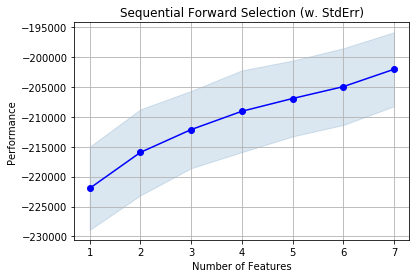

In [20]:
# Forward Stepwise Feature Selection
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=7, # the final relevant subset of features to conclude.
                        # If equal to, it starts from the intercept to the full model
          forward=True, # forward step-wise
          floating=False, 
          scoring='neg_mean_squared_error',   # how to score the results
          cv=10)        # cross-validation is not performed

sfs = sfs.fit(X, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [21]:
# choose the best 'average' model
sfs.get_metric_dict()[4]

{'feature_idx': (1, 2, 19, 92),
 'cv_scores': array([-226487.29833026, -200787.73841124, -190221.80899571,
        -210948.96253842, -237595.76297366, -193085.8182047 ,
        -191771.86429347, -190332.14425264, -199796.30401238,
        -249831.02293472]),
 'avg_score': -209085.87249471867,
 'feature_names': (1, 'zipcode', 20, 93),
 'ci_bound': 15217.006295546109,
 'std_dev': 20488.408451914864,
 'std_err': 6829.469483971621}

In [22]:
# return a few parameters of the outputs
print('Features Selected: {}'.format(sfs.k_feature_names_))
print('Score: {}'.format(sfs.k_score_))

Features Selected: (1, 'zipcode', 18, 20, 26, 81, 93)
Score: -202066.76491902076


## Embedded Methods for Feature Selection

### LASSO Regression

In [23]:
# Perform a LASSO Regression
alpha = 0.5 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, Y)

print(clf.coef_)
print('\n')
print('Intercept: {}'.format(clf.intercept_))

[ -16.42441263  -62.65154837  404.67162966    2.83157392    0.
    0.            0.           -0.           77.04728961    4.39045642
   83.45105308   -0.           -0.            0.            0.
   56.28575765    0.         -141.78057734  104.62816247 -765.69486214
  239.59420149 -104.36337746   -1.14729209    0.            0.
  183.98299874   21.07710145   38.10752725  -23.70836941  105.68903177
  113.07876067   -0.          190.32567068   -0.         -317.46831955
   -0.         -206.20155398   -0.           27.12180765   10.4064997
   -0.          148.87259368   -0.         -275.15414453  165.25694271
    0.            0.            0.            0.          165.02914976
  -11.94711433  136.86400328  -53.46948596   -0.         -110.76205913
   12.86978721   19.00692236   26.16541527    0.          100.85542324
   -0.           -0.          -19.99327834   -0.            2.24397894
   -0.          519.22985544    0.            0.         -623.76370174
  221.1846606     0.           

### Ridge Regression

In [24]:
# Performa a Ridge Regression
alpha = 10 
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, Y)

print(clf.coef_)
print('\n')
print('Intercept: {}'.format(clf.intercept_))

# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

[ -19.20202309  -59.76483402  391.84557114    2.91816602    9.51311587
  -34.28438013   50.20916762  -37.49240799  102.94843657  105.39707284
   89.47911619  -11.6298934   -36.42619044  116.51306557    0.94329558
   60.61369     -37.23770916 -140.25938644  115.39164474 -293.01036872
  121.0653807  -112.95185706  -62.09407292  -54.48845606   32.23617799
   92.91565002   35.80490694   49.88892876  -34.09637652  100.27874409
  113.65634077  -34.38699143  126.81870956  -51.40295369 -118.50104623
  -72.78168903 -160.69381302  -56.78706639   35.09544429   34.75751328
  -42.29629131   97.46809388    9.70847428 -183.20475389  177.39489606
  125.93791752  -11.38969946   68.10193434   20.38271574  126.00888977
  -78.00742382  140.16360265  -80.11427657  -78.17000049 -117.81491149
   72.74367886   26.67676075   50.81418731   -6.67793732  103.44875437
  -16.68511585   14.79817674  -33.47819972  -21.32900571   96.66909061
   -6.9484887   188.09975261  145.98514597  -22.81736071 -230.45894932
  241.

## Conclusion

***OVERVIEW***
> The goal of this assignment is to apply 3 types of prescribed feature selection techniques to crime data collected from the United States. The 3 techniques employed are: filter, wrapper, and the embedded methods.  
<br>  
> The provided dataset is first treated via renaming the obvious attributes `zip code` and `location`, and then assessed for missing values that appear as `?` entries that are replaced with `0` values.  
<br>  
> The `zip code` and `location` attributes are then compared to establish which of these to utilize as the target attribute in order to achieve the problem statement conclusion, and it is shown that `location` affords higher resolution and is thus concluded as most important.  
<br>  
> 3 of the attributes are then scaled (standardized) as based upon the significantly larger magnitudes of these as compared to the remaining dataset attributes. In hindsight, it may have been best to simply normalize the 3 attributes as the other dataset values range only from between 0 and 1 inclusive.  
<br>  

***FEATURE SELECTION METHODS***
> ***FILTER***  
> The filter methods (correlation and mutual information) are the most simple to impliment. The correlation method here is derived using the Numpy library as apposed to Pandas, although the outcomes are nearly identical. Some effort was initially employed to interpret the results, attempting to understand to which of the attributes the correaltion result was established. Next steps for either of the two filter methods derived simply need a cutoff limit and a mask to facilitate which attributes to use for ML model derivation. The mutual information is quite similar to correaltion, and is equally easy to impliment.  
<br>  
> ***WRAPPER***  
> The wrapper methods (backward and forward step-wise) intiially employ all dataset attributes excluding the target. In the backward implimentation, a single attribute is elliminated at each iteration step, where in the forward step-wise method, the reverse occurs, an attribute is added at each step. The final interpretation of results is easier to understand for both of these as compared to the filter methods due to the `.ranking_` function that is part of the library function, and that a mask is inherently part of the algorithm.  
<br>  
> ***EMBEDDED***  
> The embedded methods (LASSO and Ridge) refer to the ML model execution `.fit` that employ feature selection directly as part of establishing the model result, as apposed to the previous methods that next require a model to employ against the dataset. The lASSO method de-selects attributes based on cartesian coordinates and where the MSE intersects the axis and an originating coefficient vector with no penalty. The Ridge method on the other hand only shrinks the coefficients and is most useful for highly correlated 